# Generate data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def generate_linear_data(a, b, num):
    x = np.arange(0,num)
    y = (a*x +b) + (2*np.random.random((num)) - 1)
    return x,y

In [2]:
x,y = generate_linear_data(a=1,b=1,num=10)

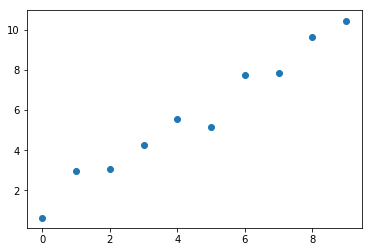

In [3]:
plt.scatter(x,y)
plt.show()

# Vanilla Linear regression closed form solution

In [4]:
def covariance(x,y):
    return np.cov(x,y)[0][1]
def variance(x):
    return np.var(x)
def mean(x):
    return np.mean(x)

class LinearRegressionClosed:
# A closed form solution, for y = B0 + B1 * x, where            
# Solving parameters for derivative of RMSE?
    B0 = None
    B1 = None
        
    def fit(self, x_arr,y_arr):
        self.B1 = covariance(x_arr,y_arr)/variance(x_arr)
        self.B0 = mean(y_arr) - self.B1 *mean(x_arr)

    def predict(self, x_arr):
        y_arr = []
        for x in x_arr:
            y_arr.append(self.B0 + self.B1 * x)
        return y_arr
        
    def get_coefficients(self):
        return self.B0, self.B1  

In [5]:
LR = LinearRegressionClosed()
LR.fit(x,y)

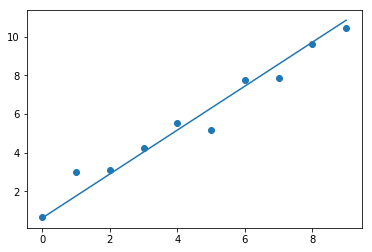

In [6]:
x_arr = range(10)
y_arr = LR.predict(x_arr)
plt.scatter(x,y)
plt.plot(x_arr, y_arr)
plt.show()

# Vanilla Linear regression with SGD

In [7]:
class LinearRegression:
    weights = None
    
    def fit(self, features, target, num_steps, lr, add_intercept = False):
        
        weights = np.random.normal(size=(features.shape[1],1))

        for step in range(num_steps):
            scores = np.matmul(features, weights)
            gradients = np.matmul(features.T, scores-target)
            weights -= lr * gradients
            
            #Print Loss every so often
            if step % 50 == 0:
                j = np.sum((np.square(scores-target)))
                print("Loss is in iteration "+str(step) + ": "+ str(j))                
        self.weights = weights
  
    def predict(self, features):
        return np.matmul(features, self.weights)

In [8]:
x_new = x.reshape((x.shape[0],-1))
y_new = y.reshape((y.shape[0],-1))
LR = LinearRegression()
LR.fit(x_new,y_new, 200, 0.005)

Loss is in iteration 0: 369.81008854
Loss is in iteration 50: 6.44000492823
Loss is in iteration 100: 6.44000492823
Loss is in iteration 150: 6.44000492823


In [9]:
x_arr = np.arange(10).reshape((10,1))
y_arr = LR.predict(x_arr)

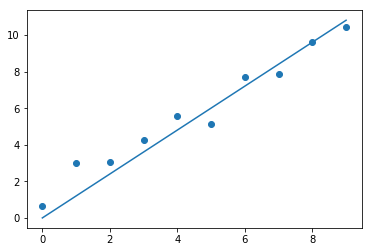

In [10]:
plt.scatter(x,y)
plt.plot(x_arr, y_arr)
plt.show()

# Scikit learn

In [14]:
from sklearn import linear_model
LR = linear_model.LinearRegression()
LR.fit(x_new,y_new)
print('Coefficients: \n', LR.coef_)

Coefficients: 
 [[ 1.02244628]]


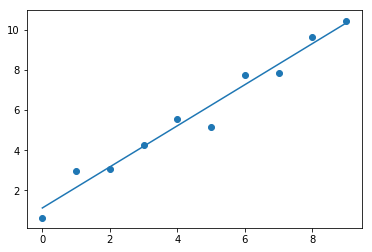

In [15]:
y_arr = LR.predict(x_arr)
plt.scatter(x,y)
plt.plot(x_arr, y_arr)
plt.show()

# Notes

Most basic and common form of predictive analysis. 
It is a linear approach to model the relationshop between a dependant variable(Y) and a few independant variables(X)

## Training process
Can be optimized using SGD. Most simple estimator is OLS(Ordinary least square errors):

Also has closed form solution:
For y = B0 + B1 * x, where
B1 = covariance(x,y)/variance(x)
B0 = mean(y) - B1 *mean(x)

## Evaluation
Use R2: Total variation as num(x) increases
Adjusted R^2: R^2 adjusted for number of features
Why not MSE?

## Regularization
More data
Regularizaion terms: L1 or L2


## Assumptions
* There must be linear relation between independant and dependant variables. Use Scatter plot to verify?
* Normal distribution of variables: Avoids distortions of results due to outliers or skewed data. Use Histogram to verify?
* No multicollinearity. Introduces redundancy and reduces our certainity in the results. Use Correlation matrix of features
* No autocorrelation: Usually for time series data. Correlation of a variable and its delayed copy. Today’s stock versus yesterday’s stock. How to check? 
* Homoscedasticity: variance around the regression line is the same for all values of the independent variable (X). That is outliers are spread across Y. Scatter plot?
* Datasize - Rule of thumb: At least 20 observations per independant variable. Citation?

## Pros:
* Very popular, suprisingly works well for many problems
* Natural extension to correlation analysis

## Cons:
* Sensitive to outliers
* Hard assumptions

## Action items
Practice: Deep dive into Kaggle Zillow competition.
* Explore and verify assumptions
* Apply regularized Linear regression
* Fit and evaluate results
* Mainly R2 and p-score

In [11]:
# Can add intercept
        if add_intercept:
            intercept = np.ones((features.shape[0], 1))
            features = np.hstack((intercept, features))

        weights = np.zeros(features.shape[1]).reshape((features.shape[1],1))



IndentationError: unexpected indent (<ipython-input-11-292bf77c07dc>, line 2)